In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('./data/commerce_dataset.csv', sep=';')

In [ ]:

# Convertendo 'dtme' para datetime e criando uma coluna 'day' como variável independente
df['dtme'] = pd.to_datetime(df['dtme'])
df['day'] = (df['dtme'] - df['dtme'].min()).dt.days

# Preparando variáveis independentes (X) e dependente (y)
X = df[['day']]  # Aqui você pode adicionar mais variáveis após a análise exploratória
y = df['total']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Predições
predictions = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Dados reais')
plt.plot(X_test, predictions, color='blue', linewidth=2, label='Predições')
plt.xlabel('Dias desde o início')
plt.ylabel('Vendas Totais')
plt.title('Vendas Reais vs. Predições')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinando o modelo
rf_model.fit(X_train, y_train)

# Fazendo predições
rf_predictions = rf_model.predict(X_test)

# Avaliando o modelo
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
print(f"Random Forest RMSE: {rf_rmse}")

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='black', label='Dados reais')
plt.scatter(X_test, rf_predictions, color='red', label='Predições RF', alpha=0.5)
plt.xlabel('Dias desde o início')
plt.ylabel('Vendas Totais')
plt.title('Vendas Reais vs. Predições Random Forest')
plt.legend()
plt.show()


03:18:57 - cmdstanpy - INFO - Chain [1] start processing
03:18:57 - cmdstanpy - INFO - Chain [1] done processing
/home/kiwi/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/kiwi/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/home/kiwi/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future ver

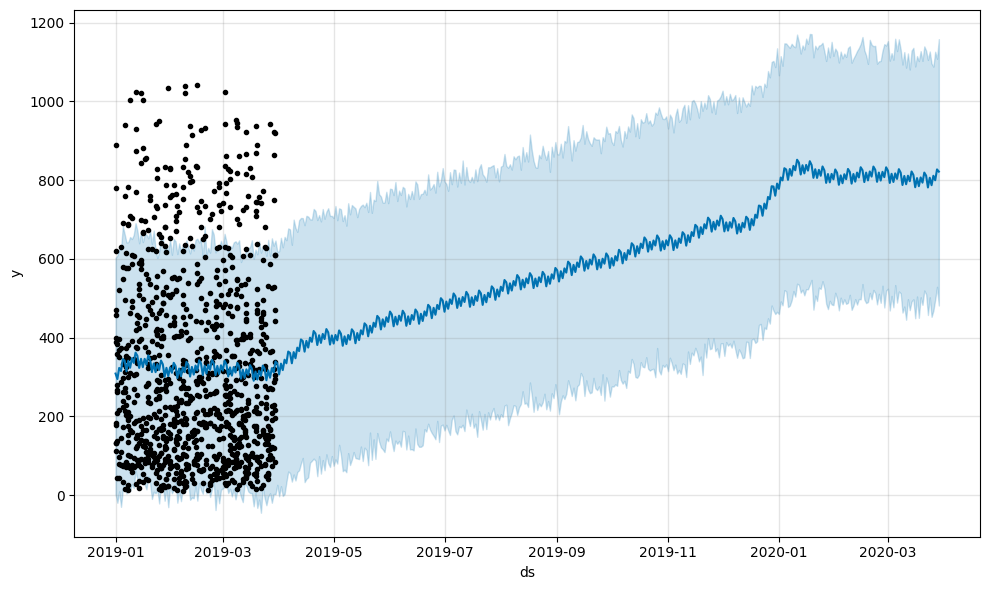

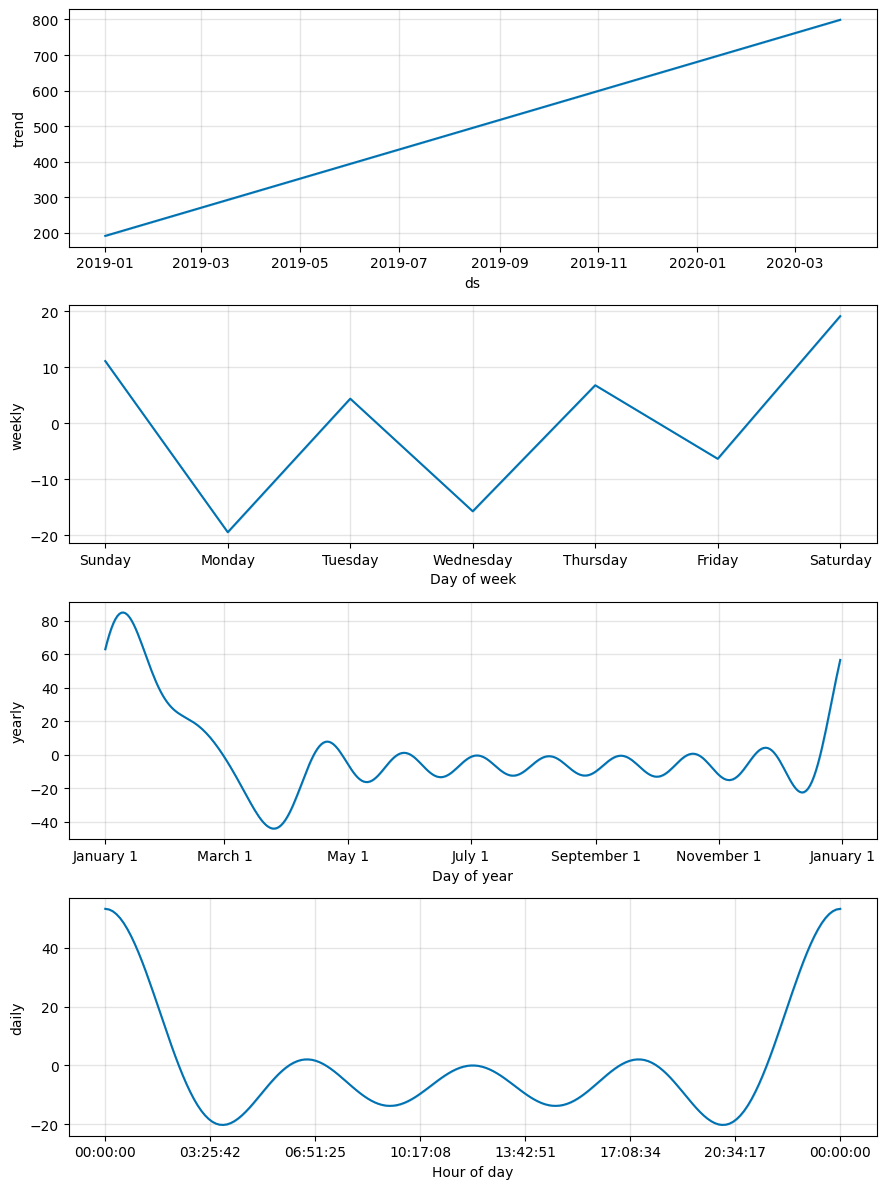

In [27]:
from prophet import Prophet
# Preparando os dados para o Prophet
# O Prophet requer que o dataframe tenha duas colunas: 'ds' para a data e 'y' para a variável que queremos prever
df_prophet = df[['dtme', 'total']].rename(columns={'dtme': 'ds', 'total': 'y'})

# Converter 'ds' para o formato datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Inicializando e ajustando o modelo Prophet
model = Prophet(daily_seasonality=True, yearly_seasonality=True)
model.fit(df_prophet)

# Criando um dataframe para as previsões futuras
future = model.make_future_dataframe(periods=365)  # Previsão para os próximos 365 dias

# Fazendo as previsões
forecast = model.predict(future)

# Visualizando as previsões
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)